In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'matplotlib'

### Load Dataset

In [36]:
def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df

In [37]:
file_name = 'data' + os.sep + 'WineQualityMix.csv'
df = load_csv(file_name)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6
1,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
2,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12989,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
12990,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
12991,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
12992,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  12994 non-null  object 
 1   fixed acidity         12984 non-null  float64
 2   volatile acidity      12986 non-null  float64
 3   citric acid           12991 non-null  float64
 4   residual sugar        12992 non-null  float64
 5   chlorides             12992 non-null  float64
 6   free sulfur dioxide   12994 non-null  float64
 7   total sulfur dioxide  12994 non-null  float64
 8   density               12994 non-null  float64
 9   pH                    12985 non-null  float64
 10  sulphates             12990 non-null  float64
 11  alcohol               12994 non-null  float64
 12  quality               12994 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.3+ MB
None


In [39]:
print(df.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   12984.000000      12986.000000  12991.000000    12992.000000   
mean        7.215943          0.339678      0.318678        5.443781   
std         1.296542          0.164636      0.145286        4.757781   
min         3.800000          0.080000      0.000000        0.600000   
25%         6.400000          0.230000      0.250000        1.800000   
50%         7.000000          0.290000      0.310000        3.000000   
75%         7.700000          0.400000      0.390000        8.100000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  12992.000000         12994.000000          12994.000000  12994.000000   
mean       0.056038            30.525319            115.744574      0.994697   
std        0.035033            17.748717             56.519679      0.002999   
min        0.009000            

# Visualization



### Histogram 

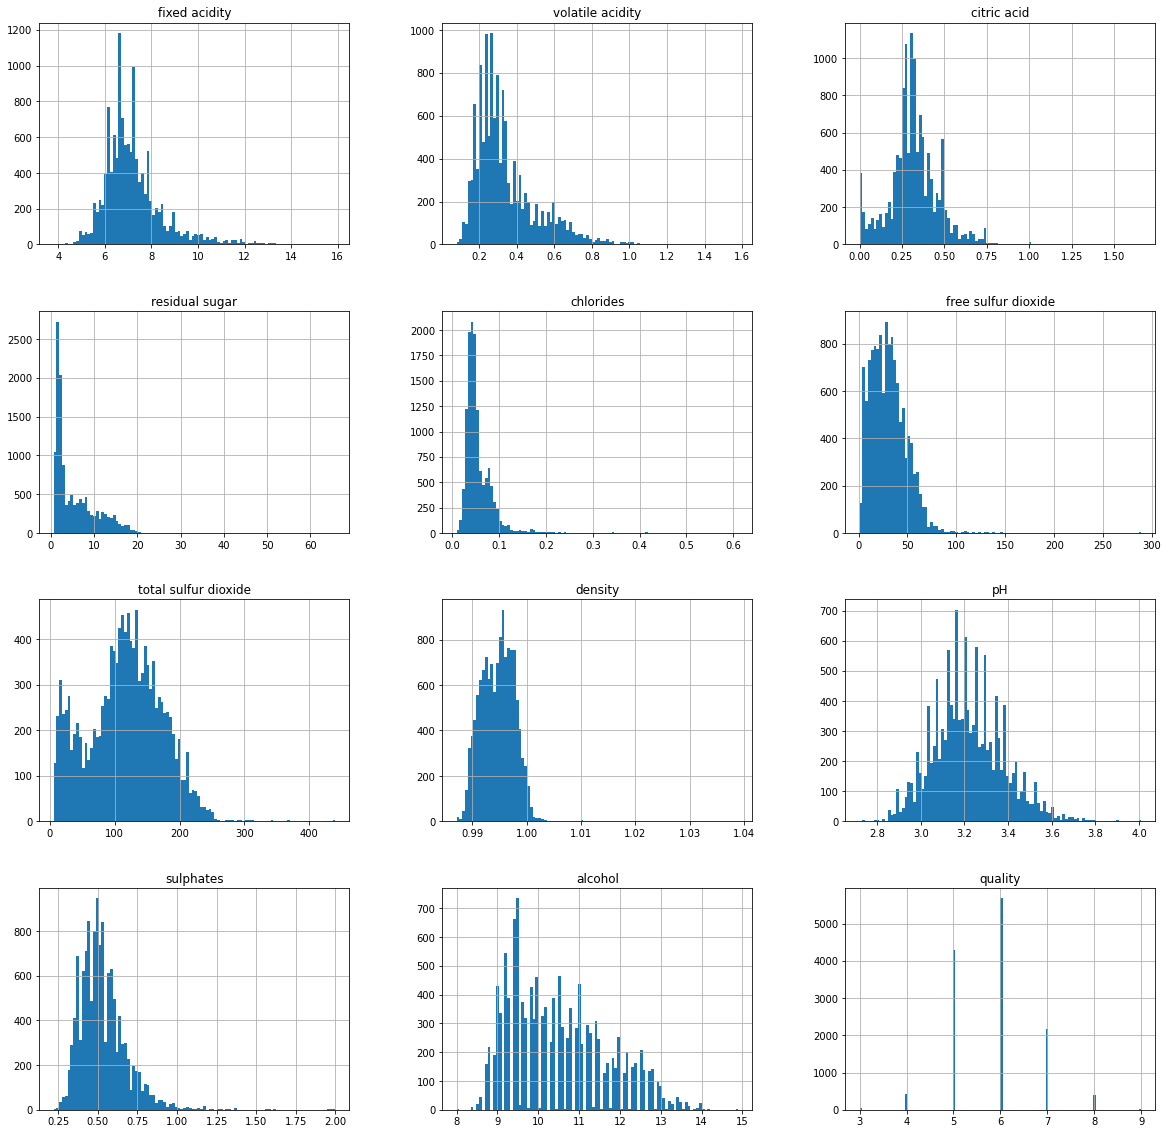

In [40]:
df.hist(bins=100,figsize=(20,20))
plt.show()

Text(0, 0.5, 'alcohol')

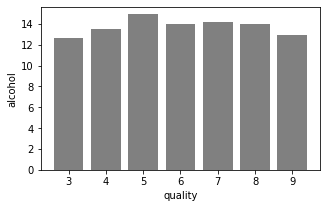

In [41]:
plt.figure(figsize=[5,3])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='gray')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

# Correlation



### # correlation between every two features

<AxesSubplot:>

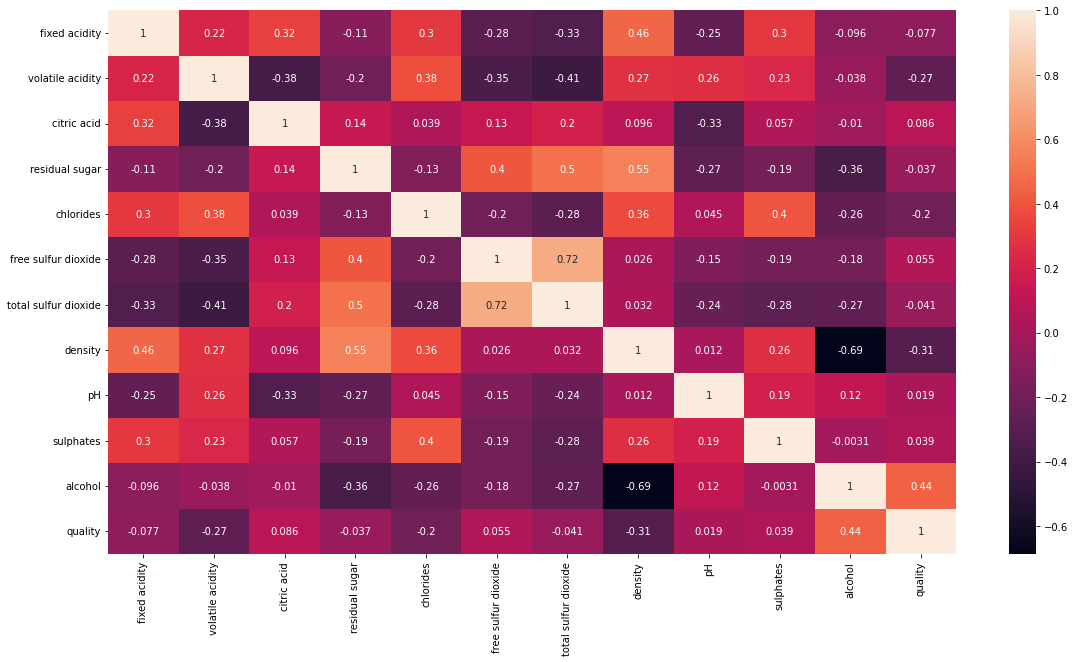

In [42]:
plt.figure(figsize=[19,10],facecolor='white')
sb.heatmap(df.corr(),annot=True)

# DELETE!!!

### Now, we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.

### If you think that why we have to discard those correlated, because relationship among them is equal they equally impact on model accuracy so, we delete one of them.

In [43]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


### Here we write a python program with that we find those features whose correlation number is high, as you see in the program we set the correlation number greater than 0.7 it means if any feature has a correlation value above 0.7 then it was considered as a fully correlated feature, at last, we find the feature total sulfur dioxide which satisfy the condition. So, we drop that feature

In [44]:
new_df=df.drop('total sulfur dioxide',axis=1)

# Handle null values

In [45]:
new_df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [46]:
# using 'numeric_only=True' we handle only numerical variables value and ignore strings

new_df.update(new_df.fillna(new_df.mean(numeric_only=True)))
new_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.0,0.21,0.38,0.8,0.020,22.0,0.98941,3.26,0.32,11.8,6
1,white,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7
2,white,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6
3,white,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5
4,white,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
12989,red,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
12990,red,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
12991,red,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
12992,red,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5


### Filling null values with the fillna() function.

In [47]:
next_df = pd.get_dummies(new_df,drop_first=True)
# display new dataframe
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,6.0,0.21,0.38,0.8,0.020,22.0,0.98941,3.26,0.32,11.8,6,1
1,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1
2,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1
3,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,1
4,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12989,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
12990,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0
12991,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
12992,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0


### get_dummies() function which is used for handling categorical columns (with string values), in our dataset ‘Type’ column feature contains two types 'Red' and 'White', where Red consider as 0 and white considers as 1

In [48]:
df_dummies[''best quality''] = [ 1 if x>=7 else 0 for x in df.quality] 
print(df_dummies)

SyntaxError: invalid syntax (3776612865.py, line 1)

# Splitting dataset

In [50]:
# (alredy imported) --> train_test_split()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

NameError: name 'x' is not defined

# Normalization

In [ ]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

# Applying Model

This is the last step where we apply any suitable model which will give more accuracy, here we will use RandomForestClassifier because it was the only ML model that gives the 88% accuracy which was considered as the best accuracy.

# RandomForestClassifier:-

In [ ]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,y_train)
# predicting score
rnd_score = rnd.score(new_xtest,y_test)
print('score of model is : ',rnd_score)
# display error rate
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(x_predict,y_test))

Now, we are at the end of our article, we can differentiate the predicted values and actual value.

In [ ]:
x_predict = list(rnd.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

# Saving Model
At last, we save our machine learning model:

In [ ]:
import pickle
file = 'wine_quality_save'
#save file
save = pickle.dump(rnd,open(file,'wb'))